![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)  <img src='images/04/data_optimization.png' align='right' width=50>

# *Practicum AI Data*: Data Optimization - Feature Engineering

This exercise is inspired by Soledad Galli (2020) <i>Python Feature Engineering Cookbook</i> from <a href="https://www.packtpub.com/product/python-feature-engineering-cookbook/9781789806311">Packt Publishers</a> and the <a href="https://github.com/PacktPublishing/Python-Feature-Engineering-Cookbook/tree/master">Software Carpentries</a>. 

Moreover, it also takes inspiration from the articles "[The Ultimate Guide to Machine Learning: Feature Engineering](https://medium.com/@simranjeetsingh1497/the-ultimate-guide-to-machine-learning-from-eda-to-model-deployment-part-2-e56ac58785f8)" and "[Three Approaches to Encoding Time Information as Features for ML Models](https://developer.nvidia.com/blog/three-approaches-to-encoding-time-information-as-features-for-ml-models/)"

***

In this notebook, we will explore commonly used feature engineering techniques to optimize different types of data, including numerical variables, categorical variables, time-series data, and text data. During our exploration, we will explore how to convert categorical data into numerical representations using encoding and vectorizing methods. We will also discuss techniques such as transformers and bins that can be applied to normalize or standardize data distributions. Furthermore, we will explore how hashing and principal component analysis (PCA) can generate new features and reduce dataset dimensionality.


## Objectives

By the end of this notebook, you will be able to:

1. Gain a comprehensive understanding of feature engineering and its significance in machine learning.
2. Apply various feature engineering techniques to optimize the dataset.

## Table of Contents

1. [Introduction](#introduction)
2. [Feature Engineering Techniques](#techniques)
    - 2.1 [Feature Engineering for Numerical Variables](#section_1)
        - 2.1.1 [Feature Selection and Extraction](#section_1_1)
        - 2.1.2 [Scaling and Normalization](#section_1_2)
        - 2.1.3 [Creating New Features](#section_1_3)
        - 2.1.4 [Skewness and Kurtosis Handling](#section_1_4)
        - 2.1.5 [Handling Imbalanced Data](#section_1_5)
    - 2.2 [Feature Engineering for Categorical Variables](#section_2)
        - 2.2.1 [Encoding Categorical Variables](#section_2_1)
        - 2.2.2 [Handling Rare Categories](#section_2_2)
    - 2.3 [Feature Engineering for Time-Series Data](#section_3)
        - 2.3.1 [Dummy Variables](#section_3_1)
        - 2.3.2 [Sine/Cosine Transformation](#section_3_2)
        - 2.3.3 [Radial Basis Functions](#section_3_3)
    - 2.4 [Feature Engineering for Text Data](#section_4)
        - 2.4.1 [Tokenization](#section_4_1)
        - 2.4.2 [Stop Word Removal](#section_4_2)
        - 2.4.3 [Stemming and Lemmatization](#section_4_3)
        - 2.4.4 [Text Normalization](#section_4_4)
3. [Conclusion](#conclusion)


## 1. Introduction<a class="anchor" id="introduction"></a>

**Feature engineering is the process of transforming raw data into a format that is suitable for machine learning algorithms to extract meaningful patterns and make accurate predictions.** It involves selecting, creating, and manipulating variables or features that represent important characteristics or properties of the data.

The goal of feature engineering is to enhance the predictive power of a machine learning model by providing it with informative and relevant inputs. This can involve a variety of techniques, such as:

* Feature selection: Identifying and choosing the most relevant features from the available data. This helps to reduce dimensionality and remove noisy or redundant information, improving the model's efficiency and generalization.

* Feature extraction: Creating new features from existing data through mathematical transformations or domain-specific knowledge. This can involve techniques like principal component analysis (PCA), wavelet transforms, or text parsing to extract meaningful information.

* Feature encoding: Converting categorical variables into numerical representations that can be understood by machine learning algorithms. This can include one-hot encoding, ordinal encoding, or target encoding.

* Feature scaling: Normalizing or standardizing numerical features to ensure they are on a similar scale. This prevents features with larger values from dominating the model's learning process and helps algorithms converge more effectively.

* Feature synthesis: Generating new features by combining existing ones or creating interactions between them. This can involve techniques like polynomial features, feature crossing, or time-based aggregations.

By performing effective feature engineering, data scientists aim to improve the performance, interpretability, and robustness of machine learning models. It requires a deep understanding of the data, domain knowledge, and creativity to transform raw data into meaningful representations that capture the underlying patterns and relationships in the data.

## 2. Feature Engineering Techniques<a class="anchor" id="techniques"></a>

In this notebook, we will delve into a range of commonly used techniques in Feature Engineering. Initially, we will cover feature selection and extraction, scaling, and normalization, creating new features, handling imbalanced data, and addressing skewness and kurtosis. Next, we will explore the encoding of categorical variables and managing rare categories. Lastly, we will focus on feature engineering approaches for handling time series and text data.

By the end of this guide, you will have a comprehensive understanding of Feature Engineering techniques and their potential to enhance the performance of your machine learning models.

Let's get started!

### 2.1 Feature Engineering for Numerical Variables<a class="anchor" id="section_1"></a>

Numerical variables are quantitative measurements expressed as numbers. They can be discrete (whole numbers) or continuous (any value within a range). Examples include age, height, weight, temperature, and income. Numerical variables are used in statistical analysis and mathematical computations.

#### 2.1.1 Feature Selection and Extraction<a class="anchor" id="section_1_1"></a>

Feature selection and extraction are important steps in machine learning, focusing on identifying the most important features from a dataset. This process enhances model accuracy and efficiency. In this section, we will explore several widely used techniques for feature selection and extraction. Additionally, we will provide code examples using Python to illustrate these techniques. 

**(1)  Principal Component Analysis**

Principal Component Analysis (PCA) is a statistical technique that reduces the dimensionality of a dataset. It achieves this by transforming the original features into a new set of features called principal components. These principal components are chosen in a way that captures the maximum variance in the data. 

By retaining a subset of the principal components that explain the majority of the variance, PCA effectively reduces the dataset's dimensionality. This lower-dimensional representation aids in the visualization, interpretation, and analysis of the data while preserving important information.

<div style="text-align:center">
    <h1 style="font-size:12px; ">How PCA Work</h1>
    <img src="images/04/pca.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://towardsdatascience.com/7-of-the-most-used-feature-engineering-techniques-bcc50f48474d#f4b0" style="text-decoration:none; color:inherit;">Medium</a></p>
</div>

Normally, PCA involves standardizing the data, calculating the covariance matrix, computing eigenvectors and eigenvalues, selecting the principal components based on high eigenvalues, and projecting the data onto a lower-dimensional space.

Now, let's see how to conduct PCA on a dataset using the scikit-learn library.

In [1]:
import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv('data/Iris.csv')
iris_data.dropna(how="all", inplace=True) # drops the empty lines

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<div style="padding: 10px;margin-bottom: 20px;border: thin solid #65BB7B;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> The <a href="https://archive.ics.uci.edu/dataset/53/iris" style="text-decoration:none; color:inherit;">Iris dataset</a>  is a dataset containing information about three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). It includes data on the length and width of the sepals and petals of the flowers in centimeters and contains 150 observations.</div>

First, we can have a look at the distribution of the data in the four dimensions (Sepal Length, Sepal Width, Petal Length, Petal Width).

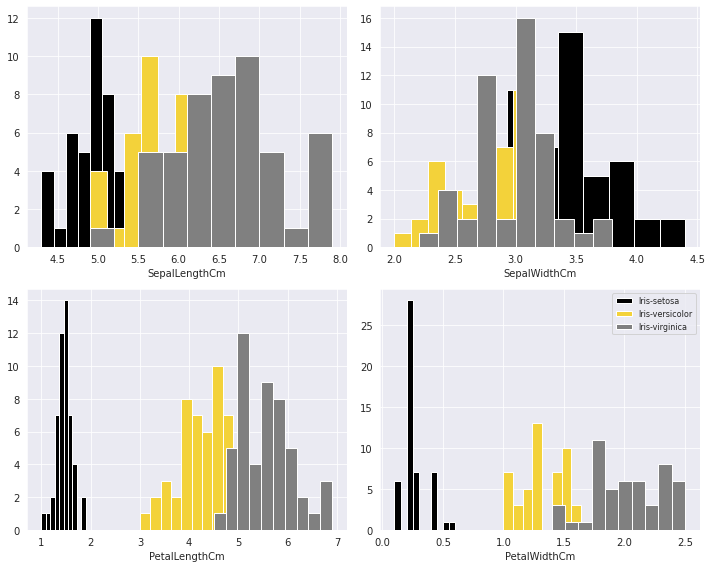

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
colors = ["black", "#f3d23aff", "grey"]
plt.figure(figsize=(10, 8))

with sns.axes_style("darkgrid"):
    for cnt, column in enumerate(iris_data.columns[1:5]):
        plt.subplot(2, 2, cnt+1)
        for species_cnt, species in enumerate(iris_data.Species.unique()):
            plt.hist(iris_data[iris_data.Species == species][column], label=species, color=colors[species_cnt])

        plt.xlabel(column)
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

The distribution clearly reveals that the individual classes can be distinguished quite effectively using the PetalWidth and PetalLength features. Thus, if limited to utilizing only two dimensions as features for the model, these two would be the optimal choice. The resulting figure obtained by plotting these dimensions is presented below.

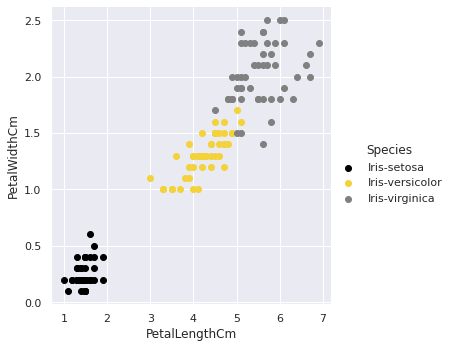

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", palette="pastel")
colors = ["black", "#f3d23aff", "grey"]

sns.FacetGrid(iris_data, hue="Species", height=5,  palette=colors) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

plt.show()

By selecting the most crucial attributes, we can effectively decrease the dimensionality while minimizing information loss. 

PCA takes it a step further by centering, scaling, and projecting the data onto new dimensions, liberating us from the constraints of the original feature space. This process can be likened to rotating a 3D dataset in space until an optimal orientation is found, enabling easier class separation.

In [4]:
from sklearn.decomposition import PCA

# Define X
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]]

# Fit PCA and transform X
pca = PCA(n_components=2).fit(X)
X_transform = pca.transform(X)

# Calculate the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.92461621 0.05301557]


<div style="padding: 10px;margin-bottom: 20px;border: thin solid #65BB7B;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> The <em>explained_variance_ratio_</em> attribute returns an array of values, where each value represents the proportion of variance explained by each principal component.</div>

Finally, let's visualize the two-dimensional plot using the new two principal components (PC).

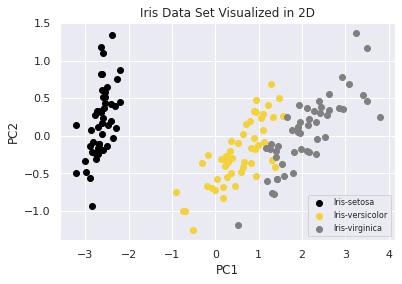

In [10]:
# Define the transform data
iris_data_trans = pd.DataFrame(X_transform).assign(Species = iris_data.Species).rename(columns={0:"PCA1", 1:"PCA2"})

# Assign numeric codes to each category in the "Species" column
iris_data_trans["Species"] = pd.Categorical(iris_data_trans["Species"])
iris_data_trans["Species"] = iris_data_trans["Species"].cat.codes

# Define custom colors for each species
color_map = {"Iris-setosa": "black", "Iris-versicolor": "#f3d23a", "Iris-virginica": "grey"}

# Plot 2D plot with custom colors and labels
for species, color in color_map.items():
    plt.scatter(iris_data_trans.loc[iris_data["Species"] == species, "PCA1"],
                iris_data_trans.loc[iris_data["Species"] == species, "PCA2"],
                c=color,
                label=species)

plt.title("Iris Data Set Visualized in 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Display the legend
plt.legend(loc='lower right', fancybox=True, fontsize=8)
plt.show()

Comparing the plot of the first two principal components (PC1 and PC2) to the two-dimensional plot of PetalWidth and PetalLength, we observe that the key information in the dataset is retained. Moreover, the data is centered and scaled for better analysis.

**(2) Linear Discriminant Analysis**

Linear Discriminant Analysis (LDA) is a supervised learning technique that is used for feature extraction in classification problems. It works by finding a new set of features that maximizes the separation between the classes in the data.

<div style="text-align:center">
    <h1 style="font-size:12px; ">PCA VS LDA</h1>
    <img src="images/04/lda.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://vivekmuraleedharan73.medium.com/what-is-linear-discriminant-analysis-lda-7e33ff59020a" style="text-decoration:none; color:inherit;">Medium</a></p>
</div>

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create an LDA object
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform the data
X_lda = lda.fit_transform(X, y)

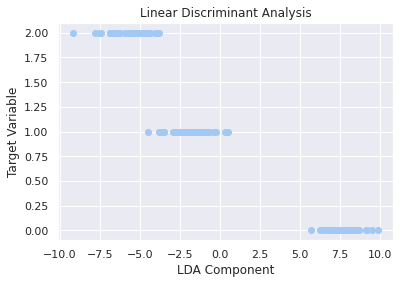

In [12]:
import matplotlib.pyplot as plt

# Plot the transformed data
plt.scatter(X_lda, y)
plt.xlabel("LDA Component")
plt.ylabel("Target Variable")
plt.title("Linear Discriminant Analysis")
plt.show()

<div style="padding: 10px;margin-bottom: 20px;border: thin solid #65BB7B;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> The transformed data <em>X_lda</em> is plotted on the x-axis and the <em>target variable y</em> is plotted on the y-axis. The x-axis represents the LDA component, which is the linear combination of the original features that maximize class separation.</div>

**(3) Correlation Analysis**

Correlation analysis is used to identify the correlation between the features in the dataset. Features that are highly correlated with each other can be removed from the dataset as they provide redundant information.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Different Correlation Type</h1>
    <img src="images/04/correlation.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://www.scribbr.com/statistics/correlation-coefficient/" style="text-decoration:none; color:inherit;">Scribbr</a></p>
</div>

Let’s see how to perform correlation analysis on a dataset using pandas.

In [14]:
import pandas as pd

# Load the Iris dataset
df = pd.read_csv('data/Iris.csv')

# Drop the 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Calculate the correlation matrix
corr_matrix = df.corr()

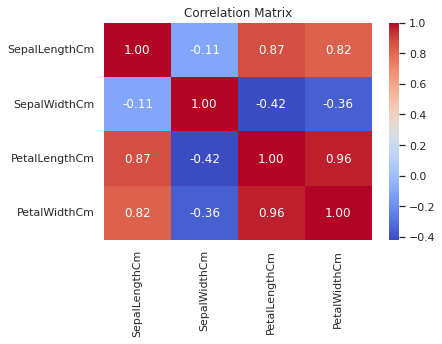

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap of correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the plot, we see that the petal length and petal width are highly correlated, as well as the petal length and sepal length have a good correlation.

In [16]:
import numpy as np

# Set the threshold for correlation
threshold = 0.9

# Set the diagonal values of the correlation matrix to 0
np.fill_diagonal(corr_matrix.values, 0)

# Find columns with correlation above the threshold
high_corr_cols = corr_matrix.columns[(corr_matrix > threshold).any()]

# Select the highly correlated features
high_corr_features = df[high_corr_cols]

# Print the selected features
print(high_corr_features.head())

   PetalLengthCm  PetalWidthCm
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2


If you identify the features that are highly correlated, you can eliminate redundant features using the `drop()` function.

In [17]:
# Drop the highly correlated features
df_new = df.drop(high_corr_cols, axis=1)
df_new.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


**(4) Recursive Feature Elimination**

 Recursive Feature Elimination (RFE) is a feature selection technique that iteratively considers smaller subsets of features. During each iteration, the model is trained on the remaining features and ranks their importance. The least important feature is then removed, and this process is repeated until the desired number of features is achieved.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Workflow Diagram of RFE</h1>
    <img src="images/04/rfe.jpg" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://www.mdpi.com/2673-4001/3/1/3" style="text-decoration:none; color:inherit;">Faysal JA et al., 2022</a></p>
</div>

Here is an example of how RFE can be used for feature selection.

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Load the California Housing dataset
data = fetch_california_housing()

# Access the feature names
feature_names = data.feature_names
print("Feature Names:", feature_names)

# Access the target variable
target = data.target
print("\nTarget Variable (Median House Value):", target)

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target Variable (Median House Value): [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [19]:
# Access the features and target variables
X = data.data  # Features
y = data.target  # Target variable (median house value)

# Create a Linear Regression model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Filter the feature names using the selected feature indices
selected_features = [feature for i, feature in enumerate(data.feature_names) if selected_feature_indices[i]]

print("Selected Features:")
print(selected_features)

Selected Features:
['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


**(5) Tree-based Methods**

Decision trees and random forests are popular tree-based methods used for feature selection and prediction. They construct a tree structure based on the most important features for predicting the target variable. Feature importance is determined by measuring the reduction in impurity achieved when splitting the data based on a particular feature.

In decision trees, the feature with the highest information gain becomes the root node, and the data is recursively split based on that feature. This process continues until a stopping criterion is met, such as reaching a maximum tree depth or a minimum number of samples per leaf.

Random forests, on the other hand, build multiple decision trees using random subsets of features and data. Feature importance is assessed by calculating the average reduction in impurity across all trees. This ensemble approach helps to reduce model variance and enhance its ability to generalize to new data.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Decision Tree vs Random Forest</h1>
    <img src="images/04/tree_forest.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://www.google.com/search?q=decision+tree+and+random+forest&tbm=isch&ved=2ahUKEwjs3sOP9uP_AhXokrAFHf9QBVwQ2-cCegQIABAA&oq=decision+tree+and+&gs_lcp=CgNpbWcQARgAMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgYIABAIEB4yBggAEAgQHjIGCAAQCBAeMgYIABAIEB46BAgjECc6BwgAEIoFEEM6CAgAEIAEELEDULAMWKAjYOIxaABwAHgAgAFZiAHvBJIBATiYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=TxWbZKz7MOilwt0P_6GV4AU&bih=609&biw=1263&rlz=1C1ONGR_enUS951US951&hl=en#imgrc=OsVV88p8MciVgM&imgdii=-93CFt-D68AMiM" style="text-decoration:none; color:inherit;">STATOLOGY</a></p>
</div>

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(iris.feature_names, importances):
    print(feature, importance)

sepal length (cm) 0.0059189255008685404
sepal width (cm) 0.006145984326963746
petal length (cm) 0.5027000743269701
petal width (cm) 0.4852350158451978


Here's an example that demonstrates using Recursive Feature Elimination (RFE) and a support vector machine (SVM) classifier in scikit-learn for feature selection.Tree-based methods also provide a way to extract features. In this case, we can generate new features based on the decision boundaries of the tree. For example, we can use the final branches of a decision tree as new binary features that indicate whether a data point falls into a specific region of the feature space. By doing this, we can create informative features based on how the tree divides the data.

**(6) Wrapper Methods**

Wrapper methods are a category of feature selection techniques where models are trained and evaluated using various subsets of features. The performance of the model is assessed for each feature subset, and the optimal subset is chosen based on the model's performance.

<div style="text-align:center">
    <h1 style="font-size:12px; ">General Framework of Wrapper Feature Selection Methods</h1>
    <img src="images/04/wrapper.jpg" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://dl.acm.org/doi/10.1145/3136625" style="text-decoration:none; color:inherit;">Jundong Li et al., 2017</a></p>
</div>

Here's an example that demonstrates using Recursive Feature Elimination (RFE) and a support vector machine (SVM) classifier in scikit-learn for feature selection.

In [21]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris

# load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Create an SVM classifier
svm = SVC(kernel='linear')

# Create a feature selector using RFE with SVM
selector = RFE(svm, n_features_to_select=2)

# Fit the selector to the data
selector.fit(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the corresponding feature names
selected_features = [data.feature_names[i] for i in selected_indices]

# Get the feature rankings
feature_rankings = selector.ranking_

# Print the feature rankings with feature names
print("Feature Rankings:")
for feature_rank, feature_name in sorted(zip(feature_rankings, data.feature_names)):
    print(f"{feature_rank}: {feature_name}")

# Print the selected features
print("\nSelected Features:")
for feature in selected_features:
    print(feature)

Feature Rankings:
1: petal length (cm)
1: petal width (cm)
2: sepal width (cm)
3: sepal length (cm)

Selected Features:
petal length (cm)
petal width (cm)


In this example, we load the iris dataset and split it into features (X) and target (y). We create an SVM classifier with a linear kernel. Using RFE with SVM, we build a feature selector and train it on the data. Finally, we print the selected features by accessing the support_ and ranking_ attributes. The selected features for the iris dataset are petal length and petal width.

**Forward Selection:** Forward Selection is a wrapper method that gradually adds one feature at a time to the model until the model's performance no longer improves. 

Here’s how it works in Python.

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Initialize the feature selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')

# Fit the feature selector
selector.fit(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the corresponding feature names
selected_features = [data.feature_names[i] for i in selected_indices]

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
MedInc
HouseAge
AveRooms
AveBedrms
Population


In the given code, we load the dataset and initialize the SequentialFeatureSelector object with a linear regression model. We fit the selector to the dataset and print the selected features. The selected features from the Forward Selection method are MedInc, HouseAge, AveRooms, AveBedrms, and Population for California housing dataset.

**Backward Elimination:** Backward Elimination is a feature selection method that iteratively removes one feature at a time from the model until further removals no longer improve the model's performance.

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Initialize the feature selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='backward')

# Fit the feature selector
selector.fit(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the corresponding feature names
selected_features = [data.feature_names[i] for i in selected_indices]

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
MedInc
HouseAge
AveBedrms
Latitude
Longitude


In the given code, we use backward elimination for feature selection. We initialize the SequentialFeatureSelector object with a linear regression model and set the direction to 'backward'. After fitting the selector on the dataset, we print the selected features. For the California housing dataset, the selected features are MedInc, HouseAge, AveBedrms, Latitude, and Longitude. The results are a little different from the Forward Elimination method.

**Exhaustive Search:** Exhaustive Search is a filter method for feature selection that involves evaluating all possible subsets of features and selecting the best subset according to a scoring criterion. 

Here’s how it works in Python.

In [24]:
from itertools import combinations
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Initialize variables
best_score = -float('inf')
best_features = None

# Loop over all possible subsets of features
for k in range(1, X.shape[1] + 1):
    for subset in combinations(range(X.shape[1]), k):
        # Train a linear regression model
        X_subset = X[:, list(subset)]
        model = LinearRegression().fit(X_subset, y)
        # Compute the R2 score
        score = r2_score(y, model.predict(X_subset))
        # Update the best subset of features
        if score > best_score:
            best_score = score
            best_features = subset

# Print the best subset of features
print("Best Subset of Features:")
for feature_index in best_features:
    print(data.feature_names[feature_index])

Best Subset of Features:
MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


In the code, we load the dataset and iterate through all possible feature subsets. For each subset, we train a linear regression model, calculate the R2 score, and update the best subset of features. Finally, we print the selected features.

**(7) Embedded Methods**

The embedded methods integrate feature selection into the model training process. Techniques like Lasso regression and Ridge regression introduce penalty terms in the loss function to promote sparse feature selection.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Feature Selection Methods</h1>
    <img src="images/04/embedded.jpg" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://www.mdpi.com/1424-8220/20/21/6318" style="text-decoration:none; color:inherit;">Liping Xie et al., 2020</a></p>
</div>

**Lasso regression** uses a penalty term with the absolute value of coefficients, enabling aggressive feature selection by setting some coefficients to zero. It is particularly useful for reducing the number of features in high-dimensional data.

In [25]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Get the coefficients
coefficients = lasso.coef_
print(coefficients)

[ 0.70571337  0.10601099 -0.         -0.         -0.         -0.
 -0.01121267 -0.        ]


<div style="padding: 10px;margin-bottom: 20px;border: thin solid #65BB7B;border-left-width: 10px;background-color: #fff"><strong>Note:</strong>
    <ul><li>The printed coefficients represent the estimated impact of each feature on the target variable. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship.</li>
    <li>The magnitude of the coefficient reflects the strength of the relationship. Features with coefficients close to zero have minimal impact on the target variable in the Lasso model due to feature selection.</li>
  </ul>
</div>

**Ridge regression** incorporates a penalty term into the loss function to encourage feature selection. This penalty term, proportional to the square of the model coefficients, leads to the selection of a smaller set of crucial features for predicting the target variable. The coefficients are shrunk towards zero but not set precisely to zero.

In [26]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit the Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

# Get the coefficients
coefficients = ridge.coef_
print(coefficients)

[ 0.82961664  0.11875818 -0.26551388  0.30567906 -0.00450071 -0.03932662
 -0.89982369 -0.87047846]


In both cases, the regularization parameter alpha determines the intensity of the penalty term. A larger alpha value leads to a more pronounced feature selection, resulting in sparser models.

#### 2.1.2 Scaling and Normalization<a class="anchor" id="section_1_2"></a>

Scaling and normalization are crucial preprocessing steps in feature engineering. They are employed to standardize the scale and range of features, facilitating improved performance and faster optimization in machine learning algorithms. Here are some widely used techniques for scaling and normalization:


**(1) Standardization**

Standardization also known as z-score normalization, rescales the features to have zero mean and unit variance. This is achieved by subtracting the mean from each value and dividing it by the standard deviation. The standardized values will have a mean of zero and a standard deviation of one.

<div style="text-align:center">
    <img src="images/04/standardization.png" width="200">
</div>

Here is an example of applying standardization using scikit-learn.

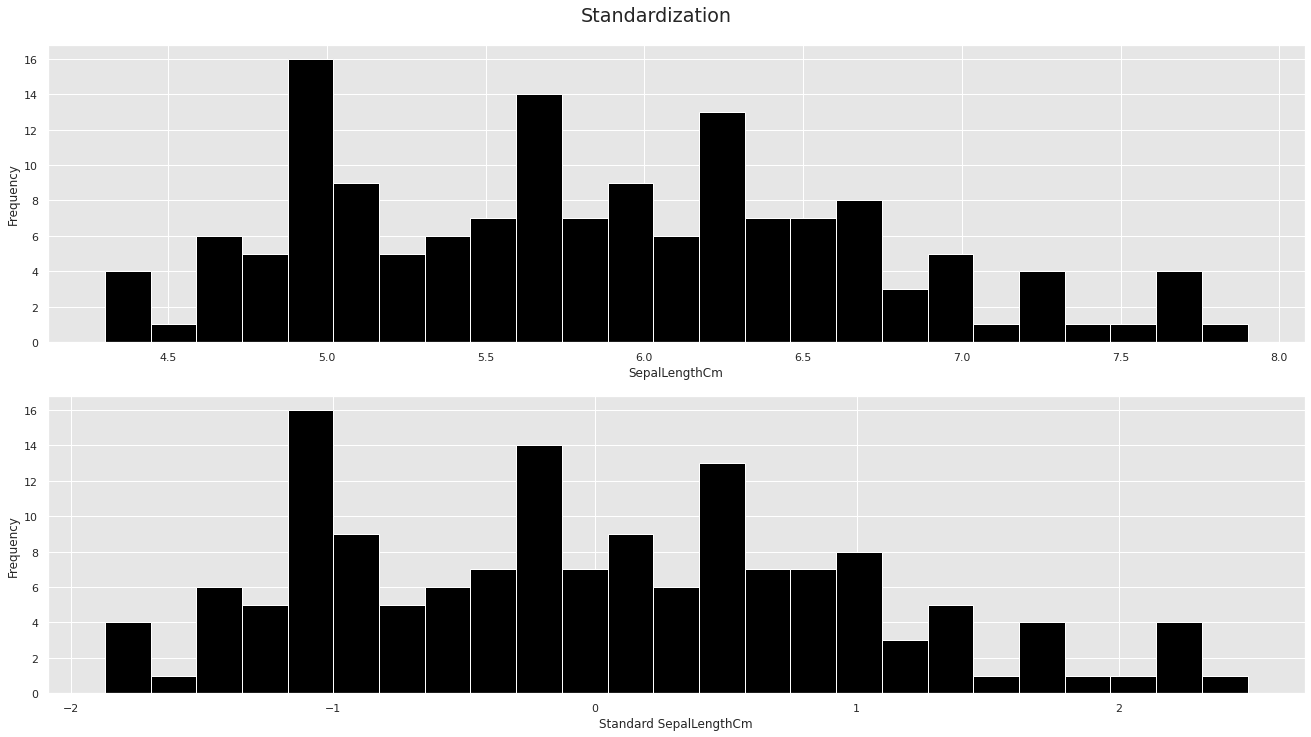

In [27]:
# Data normalization with sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Load the Iris dataset
iris_data = pd.read_csv('data/Iris.csv')
X = iris_data[["SepalLengthCm"]]

# Fit scaler and transform data
X_scale = StandardScaler().fit_transform(X)

# Plots
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Standardization')
fig.set_size_inches(18.5, 10.5)

# Subplot 1 - raw data
ax1.hist(X, 25, facecolor='black', ec="white")
ax1.set_xlabel("SepalLengthCm")
ax1.set_ylabel("Frequency")

# Subplot 2 - standard scaler
ax2.hist(X_scale, 25, facecolor='black', ec="white")
ax2.set_xlabel("Standard SepalLengthCm")
ax2.set_ylabel("Frequency")

fig.tight_layout()

**(2) Robust scaling**

Robust scaling is a technique that rescales the features using the median and interquartile range instead of the mean and standard deviation. It is particularly useful when dealing with data that contains outliers, as it is more resistant to their influence.

<div style="text-align:center">
    <img src="images/04/robust.png" width="200">
</div>

Here is an example of applying Robust scaling using scikit-learn.

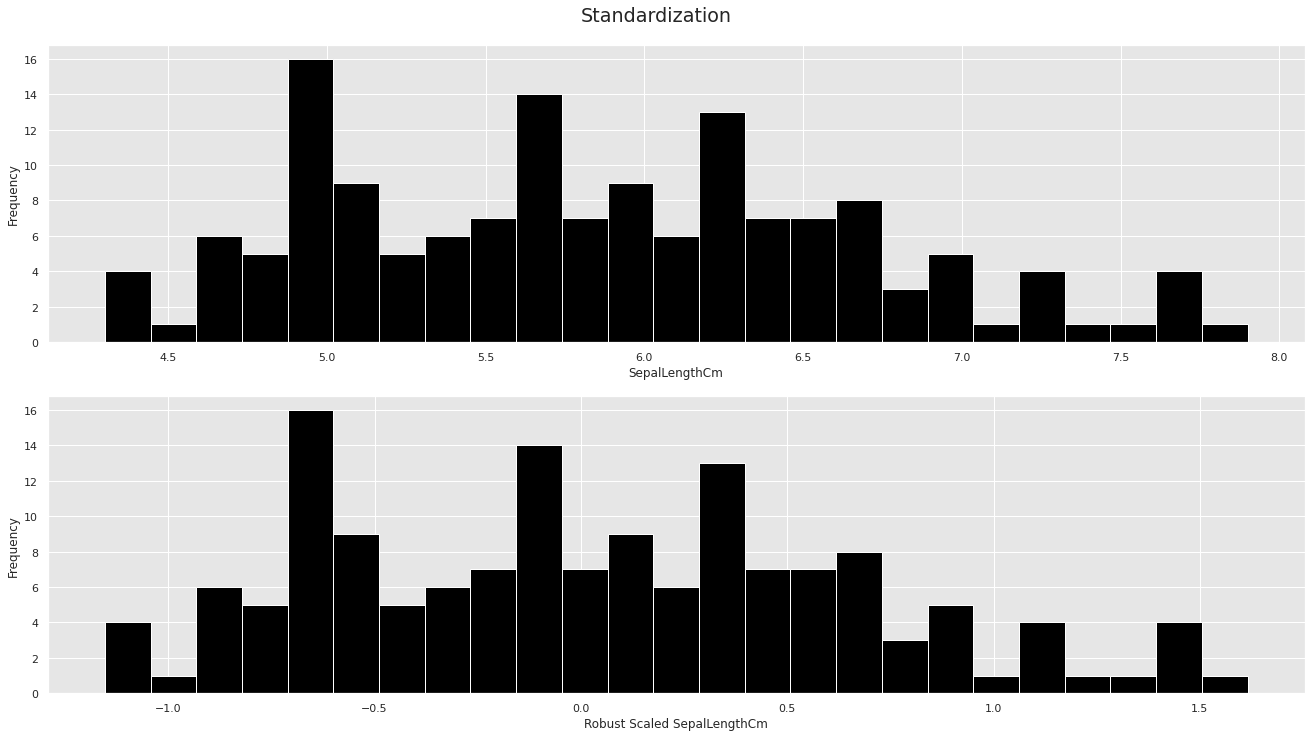

In [28]:
# Data normalization with sklearn
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Load the Iris dataset
iris_data = pd.read_csv('data/Iris.csv')
X = iris_data[["SepalLengthCm"]]

# Fit scaler and transform data
X_scale = RobustScaler().fit_transform(X)

# Plots
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Standardization')
fig.set_size_inches(18.5, 10.5)

# Subplot 1 - raw data
ax1.hist(X, 25, facecolor='black', ec="white")
ax1.set_xlabel("SepalLengthCm")
ax1.set_ylabel("Frequency")

# Subplot 2 - standard scaler
ax2.hist(X_scale, 25, facecolor='black', ec="white")
ax2.set_xlabel("Robust Scaled SepalLengthCm")
ax2.set_ylabel("Frequency")

fig.tight_layout()

**(3) Normalization**

Normalization is a technique that scales each observation so that it has a unit norm. This means that the sum of squares of each feature value is equal to 1. Normalization is commonly used in algorithms that require data to have a similar scale across all samples.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Standardization and Normalization</h1>
    <img src="images/04/stand_normal.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://medium.com/@simranjeetsingh1497/the-ultimate-guide-to-machine-learning-from-eda-to-model-deployment-part-2-e56ac58785f8" style="text-decoration:none; color:inherit;">Medium</a></p>
</div>

Here is an example of applying normalization using scikit-learn.

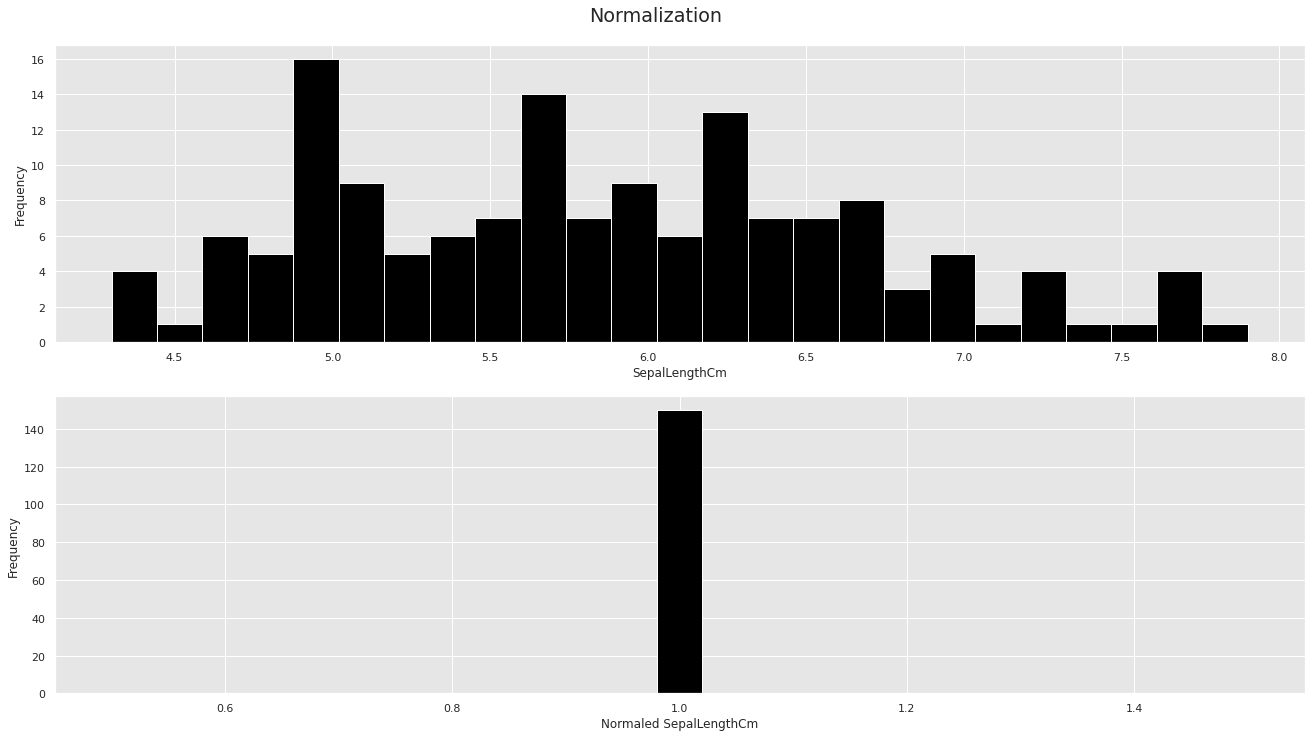

In [29]:
# Data normalization with sklearn
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Load the Iris dataset
iris_data = pd.read_csv('data/Iris.csv')
X = iris_data[["SepalLengthCm"]]

# Fit scaler and transform data
X_normal = Normalizer(norm='l2').fit_transform(X)

# Plots
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Normalization')
fig.set_size_inches(18.5, 10.5)

# Subplot 1 - raw data
ax1.hist(X, 25, facecolor='black', ec="white")
ax1.set_xlabel("SepalLengthCm")
ax1.set_ylabel("Frequency")

# Subplot 2 - normalizer
ax2.hist(X_normal, 25, facecolor='black', ec="white")
ax2.set_xlabel("Normaled SepalLengthCm")
ax2.set_ylabel("Frequency")

fig.tight_layout()

**(4) Min-Max scaling**

Min-Max scaling also known as normalization, rescales the features to a specific range, typically between 0 and 1. It involves subtracting the minimum value from each data point and dividing it by the range of values.

<div style="text-align:center">
    <img src="images/04/min_max.png" width="200">
</div>

Here is an example of applying Min-Max scaling using scikit-learn.

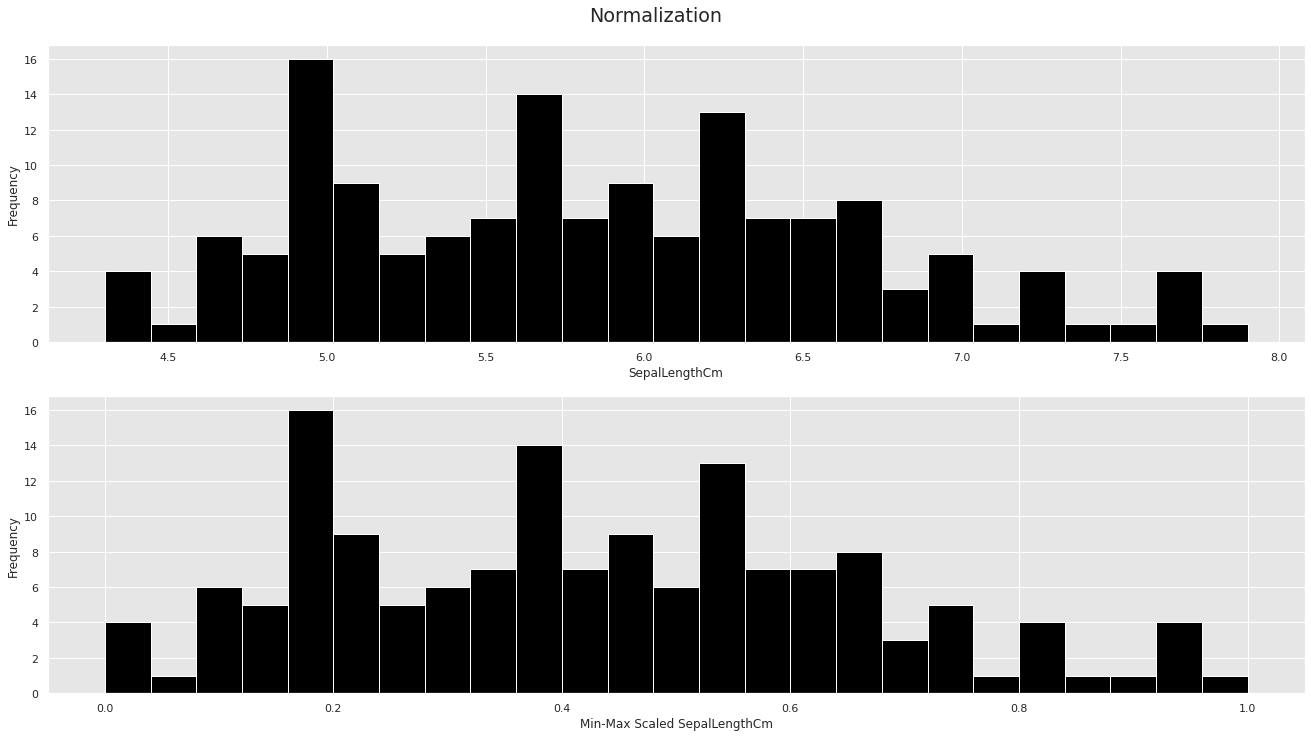

In [30]:
# Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Load the Iris dataset
iris_data = pd.read_csv('data/Iris.csv')
X = iris_data[["SepalLengthCm"]]

# Fit scaler and transform data
X_normal = MinMaxScaler().fit_transform(X)

# Plots
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Normalization')
fig.set_size_inches(18.5, 10.5)

# Subplot 1 - raw data
ax1.hist(X, 25, facecolor='black', ec="white")
ax1.set_xlabel("SepalLengthCm")
ax1.set_ylabel("Frequency")

# Subplot 2 - normalizer
ax2.hist(X_normal, 25, facecolor='black', ec="white")
ax2.set_xlabel("Min-Max Scaled SepalLengthCm")
ax2.set_ylabel("Frequency")

fig.tight_layout()

#### 2.1.3 Creating New Feature<a class="anchor" id="section_1_3"></a>

Developing new features is a vital part of feature engineering, which entails constructing new variables or columns from existing data. This can assist in capturing intricate connections between the features and enhancing the accuracy of the models.

Here are some techniques for generating new features:

**(1) Combined features** 

Combined features are generated by multiplying two or more existing features. This approach enables the capturing of collective impacts between the features and reveals novel patterns within the data. For instance, if we possess two features, "crop_yield" and "land_area", we can create a new interaction feature called "yield_area" by multiplying these two variables together.

Here is an example of creating a combined feature using Pandas in Python.

In [31]:
import pandas as pd

# Create a sample data frame
data = pd.DataFrame({'crop_yield': [100, 150, 120],
                     'land_area': [10, 12, 15]})

# Create a new interaction feature
data['yield_area'] = data['crop_yield'] * data['land_area']

# Display the updated data frame
print(data)

   crop_yield  land_area  yield_area
0         100         10        1000
1         150         12        1800
2         120         15        1800


**(2) Polynomial features** 

Polynomial features are created by raising existing variables to a higher power. This technique helps capture non-linear relationships between these variables and improves the accuracy of the models. For example, if we have a variable called "crop_yield," we can create a new polynomial feature called "crop_yield_squared" by squaring the values of this variable.

Here is an example of creating polynomial features using Scikit-learn in Python.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create a sample data set
X = np.array([[1, 2],
              [3, 4]])

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Display the updated feature matrix
print(X_poly)

[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]


**(3) Binning**

Binning involves grouping a continuous or numerical variable into a categorical feature. The process of binning introduces non-linearity and often enhances the model's performance. Additionally, it can assist in identifying missing values or outliers within the data.

There are two types of binning:

Unsupervised Binning: This includes equal width binning and equal frequency binning.
Supervised Binning: This involves entropy-based binning.
Unsupervised binning involves converting a numerical or continuous variable into categorical bins without considering the target class label. There are two categories of unsupervised binning:

Equal Width Binning is an algorithm that divides a continuous variable into multiple categories, with each bin or range having the same width.

The width of each bin is calculated using the formula: w = (max-min) / (number of bins)

The bins are defined as [min + w], [min + 2w], [min + 3w], and so on, until [min + nw], where n represents the number of bins.

In [33]:
import pandas as pd

# Create a sample data frame
data = pd.DataFrame({'crop_yield': [50, 100, 75, 120, 90, 80, 110, 95]})

# Define the number of bins and width
num_bins = 3
bin_width = (data['crop_yield'].max() - data['crop_yield'].min()) / num_bins

# Create the bins with adjusted edges to include the minimum value
bins = [float('-inf'), data['crop_yield'].min()]  # First bin for minimum value
bins += [data['crop_yield'].min() + i * bin_width for i in range(1, num_bins)]
bins.append(data['crop_yield'].max())  # Include the maximum value as the last bin edge

labels = [f'Bin {i}' for i in range(1, num_bins + 2)]  # Update labels accordingly

# Perform Equal Width Binning and drop NaN values
data['yield_category'] = pd.cut(data['crop_yield'], bins=bins, labels=labels)
data.dropna(inplace=True)

# Display the updated data frame
print(data)

   crop_yield yield_category
0          50          Bin 1
1         100          Bin 4
2          75          Bin 3
3         120          Bin 4
4          90          Bin 3
5          80          Bin 3
6         110          Bin 4
7          95          Bin 3


In this example, we divide the "crop_yield" variable into 3 equal-width bins based on the minimum and maximum values. Each crop yield value is assigned a bin label in the "yield_category" column. Additionally, we create a separate bin for the minimum value. The bin labels are adjusted accordingly, starting from 1 for the subsequent bins.

**Equal frequency binning** divides the data into categories with an equal number of values. This algorithm ensures that the data is evenly distributed among the categories.

In [34]:
import pandas as pd

# Create a sample data frame
data = pd.DataFrame({'crop_yield': [50, 100, 75, 120, 90, 80, 110, 95]})

# Define the number of bins
num_bins = 3

# Perform equal frequency binning
data['yield_category'] = pd.qcut(data['crop_yield'], q=num_bins, labels=False)

# Adjust the labels to start from 1
data['yield_category'] += 1

# Display the updated data frame
print(data)

   crop_yield  yield_category
0          50               1
1         100               3
2          75               1
3         120               3
4          90               2
5          80               1
6         110               3
7          95               2


In this example, we use the `pd.qcut()` function from pandas to perform equal frequency binning. The `q` parameter specifies the number of bins we want to create. The resulting bins are labeled with integer values in the "yield_category" column.

**Supervised binning** transforms a numerical or continuous variable into a categorical variable by considering the target class label. It utilizes the target class label to determine the cut points for discretization. One specific type of supervised binning is entropy-based binning.

*Entropy-based binning* categorizes a continuous variable based on the majority of values in each bin belonging to the same class label. It calculates the entropy for the target class labels and selects the split that maximizes the information gain. This technique helps identify meaningful categories in the data by emphasizing class differences.

In [35]:
import pandas as pd
import numpy as np

# Create a sample data frame
data = pd.DataFrame({'crop_yield': [50, 100, 75, 120, 90, 80, 110, 95],
                     'class_label': ['Low', 'High', 'Medium', 'High', 'Medium', 'Low', 'High', 'Medium']})

# Calculate entropy of class labels
class_entropy = -np.sum((data['class_label'].value_counts() / len(data)) * np.log2(data['class_label'].value_counts() / len(data)))

# Perform entropy-based binning on 'crop_yield' variable
num_bins = 3
data['yield_category'] = pd.cut(data['crop_yield'], bins=num_bins, labels=False, include_lowest=True) + 1

# Display the updated data frame
print(data)

   crop_yield class_label  yield_category
0          50         Low               1
1         100        High               3
2          75      Medium               2
3         120        High               3
4          90      Medium               2
5          80         Low               2
6         110        High               3
7          95      Medium               2


In this example, we start with a data frame containing the "crop_yield" and "class_label" columns. The entropy of the "class_label" variable is computed using the entropy formula. Then, using `pd.cut()`, we apply entropy-based binning to the "crop_yield" variable, resulting in the "yield_category" column with the assigned bin labels.

#### 2.1.4 Skewness and Kurtosis Handling<a class="anchor" id="section_1_4"></a>

Statistical measures like skewness and kurtosis aid in comprehending the distribution of data. Skewness gauges the extent of asymmetry present in the data, while kurtosis assesses the level of peakedness or flatness in the distribution.

Skewness measures the asymmetry of the data distribution.
* A positive skewness value (greater than 0) indicates a right-skewed distribution, where the tail is longer on the right side.
* A negative skewness value (less than 0) indicates a left-skewed distribution, where the tail is longer on the left side.
* A skewness value of 0 indicates a symmetric distribution.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Skewness</h1>
    <img src="images/04/skewness.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://medium.com/@simranjeetsingh1497/the-ultimate-guide-to-machine-learning-from-eda-to-model-deployment-part-2-e56ac58785f8" style="text-decoration:none; color:inherit;">Medium</a></p>
</div>

Kurtosis measures the tailedness or peakedness of the data distribution compared to a normal distribution.
* Leptokurtic distributions have positive kurtosis values (> 0) and exhibit heavier tails and a more peaked shape compared to a normal distribution.
* Platykurtic distributions have negative kurtosis values (< 0) and display lighter tails and a flatter shape compared to a normal distribution.
* Mesokurtic distributions have a kurtosis value of 0, indicating a similar level of tailedness and peakedness as a normal distribution.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Kurtosis</h1>
    <img src="images/04/kurtosis.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://365datascience.com/calculators/kurtosis-calculator/" style="text-decoration:none; color:inherit;">365DataScience</a></p>
</div>

Skewed and kurtosis data can negatively affect the performance of machine learning models. To address both skewness and kurtosis in data, consider the following transformation techniques:

**(1) Log Transformation**:
   - *Application*: Logarithmic transformation can be used to reduce the skewness and kurtosis of data.
   - *Applicability*: It is suitable for both positively and negatively skewed data, making it effective in addressing both skewness and kurtosis.
   - *Method*: Apply the natural logarithm or base-10 logarithm to the data.

**(2) Square Root Transformation**:
   - *Application*: The square root transformation can be used to reduce skewness and kurtosis in data.
   - *Applicability*: It is particularly effective for positively skewed data, addressing both skewness and kurtosis simultaneously.
   - *Method*: Take the square root of each data point.

**(3) Square Transformation**:
   - *Application*: The square transformation can be used to reduce skewness and kurtosis in data.
   - *Applicability*: It is suitable for both positively and negatively skewed data, making it useful for handling both skewness and kurtosis.
   - *Method*: Square each data point.

**(4) Box-Cox Transformation**:
   - *Application*: The Box-Cox transformation is a versatile method for handling skewness and kurtosis in data.
   - *Applicability*: It can handle both positively and negatively skewed data, effectively addressing both skewness and kurtosis.
   - *Method*: It uses a parameter lambda (λ) to determine the appropriate transformation to be applied. The optimal lambda value can be determined using statistical techniques.

By employing these transformation techniques, you can adjust the distribution of the data, reducing skewness and kurtosis, and improving the suitability of the data for machine learning models.

Below is an example of Python code demonstrating these transformations.

In [36]:
import numpy as np
import pandas as pd
from scipy import stats

# Generate some skewed data
data = np.random.gamma(1, 10, 1000)

# Calculate skewness and kurtosis
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

# Log transformation
log_data = np.log(data)
log_skewness = stats.skew(log_data)
log_kurtosis = stats.kurtosis(log_data)

print("Log Skewness:", log_skewness)
print("Log Kurtosis:", log_kurtosis)

# Square root transformation
sqrt_data = np.sqrt(data)
sqrt_skewness = stats.skew(sqrt_data)
sqrt_kurtosis = stats.kurtosis(sqrt_data)

print("Sqrt Skewness:", sqrt_skewness)
print("Sqrt Kurtosis:", sqrt_kurtosis)

# Square transformation
square_data = np.square(data)
square_skewness = stats.skew(square_data)
square_kurtosis = stats.kurtosis(square_data)

print("Square Skewness:", square_skewness)
print("Square Kurtosis:", square_kurtosis)

# Box-Cox transformation
box_cox_data, _ = stats.boxcox(data)
box_cox_skewness = stats.skew(box_cox_data)
box_cox_kurtosis = stats.kurtosis(box_cox_data)

print("Box-Cox Skewness:", box_cox_skewness)
print("Box-Cox Kurtosis:", box_cox_kurtosis)

Skewness: 2.3093771290753855
Kurtosis: 8.378404044788752
Log Skewness: -1.1474922772321914
Log Kurtosis: 2.261486849468504
Sqrt Skewness: 0.7314493118412784
Sqrt Kurtosis: 0.627027476624527
Square Skewness: 7.100421485483846
Square Kurtosis: 70.13888862291691
Box-Cox Skewness: -0.021619570843628547
Box-Cox Kurtosis: -0.1191551339833179


#### 2.1.5 Handling Imbalanced Data<a class="anchor" id="section_1_5"></a>

Addressing imbalanced data is a vital task in machine learning. Imbalanced data occurs when the distribution of the target variable is uneven, with one class being less represented than the other. This imbalance can introduce bias in the model, leading to poor performance in the minority class. 

There are various techniques to handle imbalanced data:

**(1) Oversampling**

Oversampling involves generating additional samples for the minority class by resampling the existing samples with replacement. This helps to increase the representation of the minority class and can be implemented using the `resample` function from the `sklearn.utils` module.

In [37]:
import numpy as np
from sklearn.utils import resample

# Create a sample dataset
X_majority = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Majority class samples
y_majority = np.array([0, 0, 0, 0])  # Majority class labels

X_minority = np.array([[5, 6], [6, 7]])  # Minority class samples
y_minority = np.array([1, 1])  # Minority class labels

# Upsample minority class
X_upsampled, y_upsampled = resample(X_minority, y_minority, replace=True, n_samples=len(X_majority), random_state=42)

# Check the upsampled data
print("Upsampled X:", X_upsampled)
print("Upsampled y:", y_upsampled)

Upsampled X: [[5 6]
 [6 7]
 [5 6]
 [5 6]]
Upsampled y: [1 1 1 1]


**(2) Undersampling**

Undersampling involves reducing the number of samples from the majority class to achieve a balanced distribution. This also can be achieved using the `resample` function from the `sklearn.utils`module.

<div style="text-align:center">
    <img src="images/04/under_oversampling.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392" style="text-decoration:none; color:inherit;">Medium</a></p>
</div>

In [38]:
import numpy as np
from sklearn.utils import resample

# Create a sample dataset
X_majority = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Majority class samples
y_majority = np.array([0, 0, 0, 0])  # Majority class labels

X_minority = np.array([[5, 6], [6, 7]])  # Minority class samples
y_minority = np.array([1, 1])  # Minority class labels

# Downsample majority class
X_downsampled, y_downsampled = resample(X_majority, y_majority, replace=False, n_samples=len(X_minority), random_state=42)

# Check the downsampled data
print("Downsampled X:", X_downsampled)
print("Downsampled y:", y_downsampled)

Downsampled X: [[2 3]
 [4 5]]
Downsampled y: [0 0]


**(3) SMOTE**

The Synthetic Minority Over-sampling Technique (SMOTE) is a method that generates synthetic samples for the minority class by utilizing the available samples. To implement SMOTE, you can utilize the `SMOTE` function provided by the `imblearn.over_sampling` module.

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42
)

counter1 = Counter(y)
print('Before', counter1)

# Create an instance of SMOTE
sm = SMOTE(random_state=42)

# Use SMOTE to upsample the minority class
X_resampled, y_resampled = sm.fit_resample(X, y)

# Print the shape of the resampled dataset
counter2 = Counter(y_resampled)
print("After", counter2)

Before Counter({0: 897, 1: 103})
After Counter({0: 897, 1: 897})


**(4) Class weighting**

Class weighting is a technique that involves assigning weights to different classes in a model to address class imbalance. This can be achieved by utilizing the `class_weight` parameter within the model.

In [40]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression with class weighting
clf = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.865


**(5) Anomaly detection**

Anomaly detection finds and removes outliers in data. It helps identify rare events or observations that deviate significantly from the expected behavior. In imbalanced data, anomaly detection can label the infrequent observations in the minority class as anomalies, thus improving dataset balance and enhancing model performance.

Clustering and one-class classification are typical methods used for anomaly detection in imbalanced data. Clustering groups similar minority class observations, while one-class classification trains a model on the majority class to detect anomalies in the minority class.

In [41]:
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the original training data
print("Original training data shape:", X_train.shape, y_train.shape)

# Create an instance of Isolation Forest
clf = IsolationForest(random_state=42)

# Fit the model on the training data
clf.fit(X_train)

# Get the boolean indexing array for non-anomalous samples
is_non_anomaly = clf.predict(X_train) == 1

# Apply the boolean indexing to filter out non-anomalous samples
X_train = X_train[is_non_anomaly]
y_train = y_train[is_non_anomaly]

# Print the shape of the filtered training data
print("Filtered training data shape:", X_train.shape, y_train.shape)

Original training data shape: (800, 10) (800,)
Filtered training data shape: (746, 10) (746,)


**(6) Cost-Sensitive Learning** 

Cost-Sensitive Learning refers to the practice of assigning varying costs to different types of errors in a model to address class imbalance. This can be achieved by utilizing the `sample_weight` parameter in the model. By assigning different weights to different classes or instances, the model can emphasize the importance of correctly predicting the minority class or reducing errors in the imbalanced data.

In [42]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights for cost-sensitive learning
class_weights = {0: 1, 1: 10}  # Adjust the weights based on the specific requirements

# Convert class weights dictionary to an array-like object
sample_weights = np.array([class_weights[label] for label in y_train])

# Create an instance of Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data with class weights
clf.fit(X_train, y_train, sample_weight=sample_weights)

# Evaluate the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9


### 2.2 Feature Engineering for Categorical Variables<a class="anchor" id="section_2"></a>

Categorical variables represent qualitative attributes and consist of distinct categories or groups. They cannot be measured numerically or ordered. Examples include gender, color, and occupation. Categorical variables are used for classification and grouping in data analysis and machine learning.

<div style="text-align:center">
    <h1 style="font-size:12px; ">Type of Varibles</h1>
    <img src="images/04/variables.png" width="400">
    <p style="font-style:italic; font-size:12px; text-align:center">Image Source:<a href="https://thefactfactor.com/facts/management/statistics/variable/1432/" style="text-decoration:none; color:inherit;">The FactFactor</a></p>
</div>

#### 2.2.1 Encoding Categorical Variables<a class="anchor" id="section_2_1"></a>
The process of encoding categorical variables is vital in feature engineering, as it transforms categorical data into a numerical format understandable by machine learning algorithms. Various commonly employed techniques for encoding categorical variables include:

**(1) One-Hot Encoding**

One-hot encoding is a method that transforms categorical variables into a binary feature set, where each feature represents a distinct category from the original variable. This technique involves creating a new binary column for each category, assigning a value of 1 if the category is present and 0 if it is not.

Below is an example using the pandas library for one-hot encoding.

In [43]:
import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv('data/Iris.csv')

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(iris_data)

# Display the encoded dataset
print(encoded_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                    1                        0                       0  
1                    1                        0                       0  
2                    1                        0                       0  
3                    1                        0                       0  
4                    1                        0                       0  


Below is an example using the scikit-learn library for one-hot encoding.

In [45]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv('data/Iris.csv')

# Extract the categorical column(s) to encode
categorical_cols = ['Species']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical column(s)
encoded_data = encoder.fit_transform(iris_data[categorical_cols])

# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded dataframe with the original dataframe
final_df = pd.concat([iris_data, encoded_df], axis=1)

# Display the final encoded dataset
print(final_df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                  1.0                      0.0                     0.0  
1                  1.0                      0.0                     0.0  
2                  1.0                      0.0                     0.0  
3                  1.0                      0.0                     0.0  
4                  1.0                      0.0                     0.0  


**(2) Label Encoding**

Label encoding is a method that assigns a distinct numerical value to each category present in the original variable. This technique involves assigning a numerical label to each category in the order of their appearance within the variable.

Here's an example using the scikit-learn library.

In [47]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({
   'color': ['red', 'blue', 'green', 'red', 'yellow', 'blue']
})

# Apply label encoding
label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df['color'])

# Display the updated dataframe
print(df)

    color  color_encoded
0     red              2
1    blue              0
2   green              1
3     red              2
4  yellow              3
5    blue              0


**(3) Ordinal Encoding**

Ordinal encoding is a method that assigns a numerical value to each category present in the original variable, considering their order or rank. This technique involves ordering the categories based on a specific criterion and assigning numerical values to them based on their position within the order.

Here's an example using the category_encoders library.

In [46]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({
   'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

# Apply ordinal encoding
encoder = OrdinalEncoder()
df['size_encoded'] = encoder.fit_transform(df[['size']])

# Display the encoded dataframe
print(df)

     size  size_encoded
0   small           2.0
1  medium           1.0
2   large           0.0
3  medium           1.0
4   small           2.0
5   large           0.0


#### 2.2.2 Handling Rare Categories<a class="anchor" id="section_2_2"></a>
Rare category handling techniques can be employed to address infrequently occurring categories within categorical variables. These techniques aim to mitigate challenges faced by machine learning models due to the limited representation of rare categories. Several approaches include:

**(1) Grouping rare categories**

This technique involves consolidating rare categories into a single category or a few categories. By doing so, the number of categories is reduced, and the representation of rare categories is increased.

**(2) Replacing rare categories with a common category**

In this approach, rare categories are replaced with the most common category within the variable. This strategy proves effective when the rare categories are deemed less significant for the analysis.

**(3) One-hot encoding with a flag**

This method entails creating a new category specifically for rare categories and assigning a flag to identify them as rare. This approach enables the model to differentiate rare categories from other categories.

Let's take an example of managing rare categories with the Breast Cancer dataset from scikit-learn.

In [48]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)
breast_cancer['target'] = data.target

# View the value counts of the 'mean smoothness' column
print(breast_cancer['mean smoothness'].value_counts())

0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08876    1
0.09965    1
0.13230    1
0.08968    1
0.05263    1
Name: mean smoothness, Length: 474, dtype: int64


In [49]:
# Group rare categories into a single category
breast_cancer['mean smoothness'] = np.where(breast_cancer['mean smoothness'] > 2, breast_cancer['mean smoothness'], 'Rare')

# View the value counts of the 'mean smoothness' column after grouping
print(breast_cancer['mean smoothness'].value_counts())

Rare    569
Name: mean smoothness, dtype: int64


In [50]:
# Replace rare categories with the most common category
most_common_category = breast_cancer['mean smoothness'].mode()[0]
breast_cancer['mean smoothness'] = np.where(breast_cancer['mean smoothness'] == 'Rare', most_common_category, breast_cancer['mean smoothness'])

# View the value counts of the 'mean smoothness' column after replacement
print(breast_cancer['mean smoothness'].value_counts())

Rare    569
Name: mean smoothness, dtype: int64


In [51]:
# Create a new category for rare categories and flag them as rare
breast_cancer['mean smoothness_Rare'] = np.where(breast_cancer['mean smoothness'] == 'Rare', 1, 0)

# Display the updated dataset
print(breast_cancer.head())

   mean radius  mean texture  mean perimeter  mean area mean smoothness  \
0        17.99         10.38          122.80     1001.0            Rare   
1        20.57         17.77          132.90     1326.0            Rare   
2        19.69         21.25          130.00     1203.0            Rare   
3        11.42         20.38           77.58      386.1            Rare   
4        20.29         14.34          135.10     1297.0            Rare   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                

### 2.3 Feature Engineering for Time-Series Data<a class="anchor" id="section_3"></a>

For time-series data analysis, feature engineering is a powerful technique that allows us to extract valuable information and create informative features. By applying techniques such as lag features, rolling statistics, Fourier and Sine/Cosine transform, and time-based features, we can uncover temporal dependencies, trends, seasonality, and other patterns in the data. It's important to note that these feature engineering techniques are not limited to time series forecasting alone; they can also be applied to regression or classification tasks.

In this section, we will create meaningful features using time-related information for time series data. We'll generate a time series dataset and explore three methods for generating time-related features. These methods capture temporal dynamics, trends, and seasonality. By evaluating the effectiveness of these features using linear regression, we can improve the predictive performance and gain valuable insights for time series analysis.

**First, Setup and Data Preparation**

Import the required libraries as follows:

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error

Create a custom time series dataset.

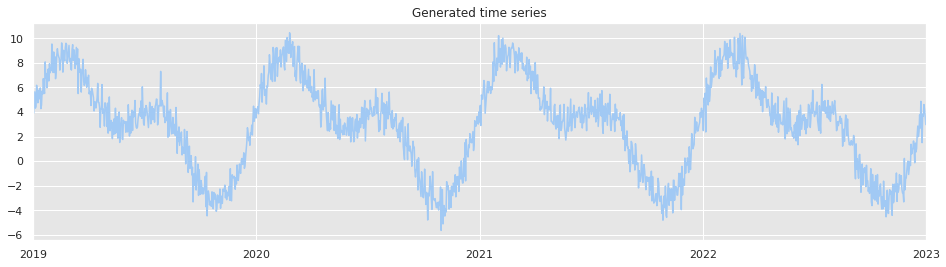

In [54]:
# For reproducibility
np.random.seed(42)

# Generate the DataFrame with dates
range_of_dates = pd.date_range(
    start="2019-01-01",
    end="2023-01-01"
)
X = pd.DataFrame(index=range_of_dates)

# Create a sequence of day numbers
X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year

# Generate the components of the target
signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

# Combine them to get the target series
y = signal_1 + signal_2 + noise
y.plot(figsize=(16,4), title="Generated time series");

In [55]:
# Store the data
time_df = y.to_frame()
time_df.columns = ["actuals"]

**Second, creating time-related features**

In this section, we will discuss the three approaches we considered for generating time-related features.

Before delving into the details, let's establish an evaluation framework. The simulated data spans a four-year period. We will utilize the first three years of generated data as the training set and evaluate the performance in the fourth year. The Mean Absolute Error (MAE) will be used as the evaluation metric.

#### 2.3.1 Dummy Variables<a class="anchor" id="section_3_1"></a>

In the context of time series data analysis, dummy variables are binary variables created to represent specific time periods or events. They are used to indicate whether a particular time period or event is present or not in the dataset. By assigning a value of 1 for the presence and 0 for the absence of the time period or event, dummy variables allow for the incorporation of temporal information in the analysis. This enables the examination of the impact of specific time periods or events on the observed patterns and dynamics of the time series data.

In [56]:
# Create the dummies variables
X_1 = pd.DataFrame(data=pd.get_dummies(X.index.month, drop_first=True, prefix="month"))
X_1.index = X.index
X_1

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2019-01-01,0,0,0,0,0,0,0,0,0,0,0
2019-01-02,0,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,0,0,0,0,0,0,0,0,0,0
2019-01-04,0,0,0,0,0,0,0,0,0,0,0
2019-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,0,0,0,0,0,0,0,0,0,0,1
2022-12-29,0,0,0,0,0,0,0,0,0,0,1
2022-12-30,0,0,0,0,0,0,0,0,0,0,1
2022-12-31,0,0,0,0,0,0,0,0,0,0,1


The code creates dummy variables for the month component of the index in a DataFrame called *X*. The resulting DataFrame, *X_1*, has columns representing the different months, with 1 indicating the presence of that month and 0 indicating its absence in the original dataset.

As mentioned earlier, the purpose of feature engineering is to simplify the model by focusing on the features. To explore this concept, we will use a simple machine learning model, linear regression, to evaluate how well we can fit the time series using only the created dummy variables. This analysis will help us understand the impact of these features on the model's performance.

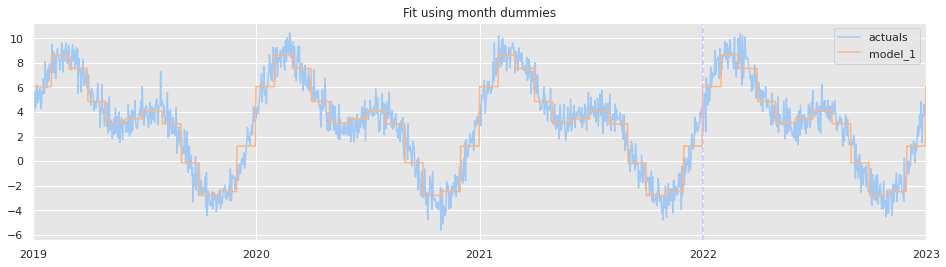

In [57]:
# Define the train period
TRAIN_END = 3 * 365

# Modeling
model_1 = LinearRegression().fit(X_1.iloc[:TRAIN_END],
                             y.iloc[:TRAIN_END])
time_df["model_1"] = model_1.predict(X_1)

# Plot the result
time_df[["actuals", "model_1"]].plot(figsize=(16,4),
                                    title="Fit using month dummies")
plt.axvline(date(2022, 1, 1), c="m", linestyle="--");

By observing the plot, we can notice that the fitted line closely aligns with the time series data. However, the line appears somewhat jagged or step-like due to the discontinuity of the dummy features.

#### 2.3.2 Sine/Cosine Transformation<a class="anchor" id="section_3_2"></a>

The prior fitted line shows a step-like pattern due to the different treatments of each dummy variable without considering continuity. However, time-related variables are cyclical, with stronger connections between consecutive periods. To capture this, we can use trigonometric functions like sine and cosine to transform the cyclical time feature into two new features.

First, we create a copy of the initial data frame. Then, we add a column containing the month numbers and apply sine/cosine transformations to encode both the month and day_of_year columns. Finally, we plot the resulting curves for both pairs of variables.

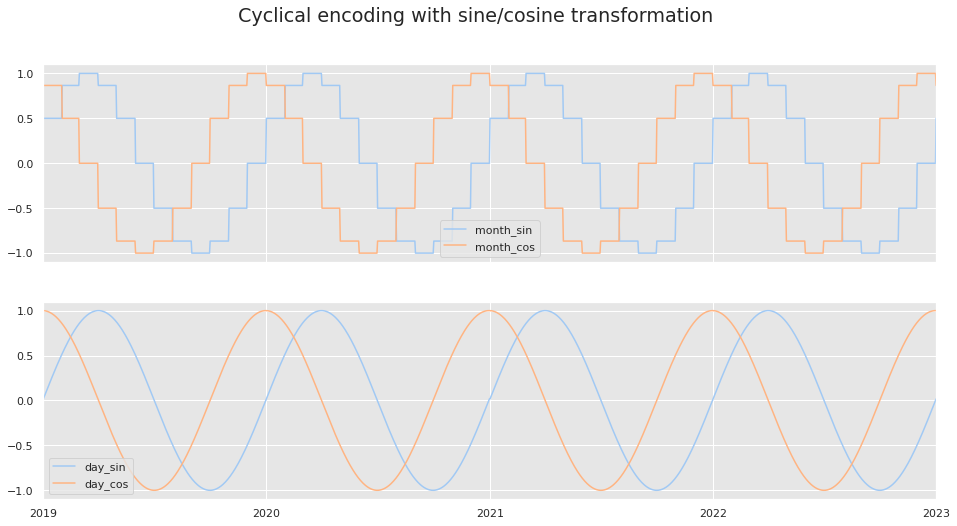

In [58]:
X_2 = X.copy()
X_2["month"] = X_2.index.month

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]
X_2["day_sin"] = sin_transformer(365).fit_transform(X_2)["day_of_year"]
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2)["day_of_year"]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

Now, we will fit the linear regression model using only the newly created features derived from the daily frequency.

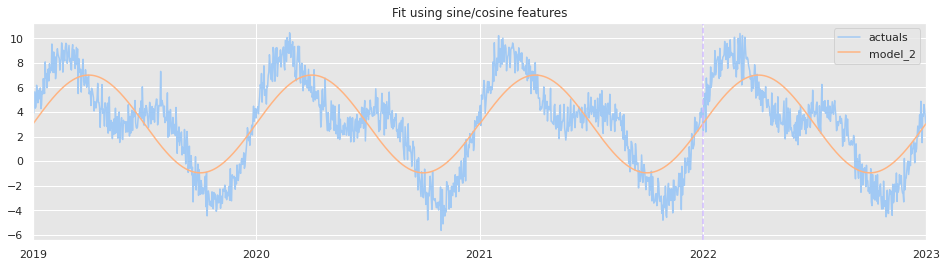

In [62]:
X_2_daily = X_2[["day_sin", "day_cos"]]

# Modeling
model_2 = LinearRegression().fit(X_2_daily.iloc[:TRAIN_END], y.iloc[:TRAIN_END])
time_df["model_2"] = model_2.predict(X_2_daily)

# Plotting the result
time_df[["actuals", "model_2"]].plot(figsize=(16, 4), title="Fit using sine/cosine features")
plt.axvline(date(2022, 1, 1), c="m", linestyle="--");

The plot demonstrates that the model captures the general pattern of the data, recognizing periods with both higher and lower values. However, the accuracy of the predictions in terms of magnitude appears to be lower, and upon initial observation, this fit seems to be less satisfactory compared to the one achieved using dummy variables.

#### 2.3.3 Radial Basis Functions<a class="anchor" id="section_3_3"></a>

Radial basis functions (RBFs) related to time-series data are mathematical functions used to model temporal patterns. They are centered at specific points in the time domain and exhibit radial symmetry. RBFs capture cyclical or seasonal patterns in time-series data and enable flexible modeling and prediction. Their design depends on the data characteristics and modeling goals. RBFs are powerful tools for analyzing time-series data by representing complex temporal patterns effectively.

We will use the scikit-lego library, which extends scikit-learn, to leverage the `RepeatingBasisFunction` class. This class allowed us to create 12 basis functions based on the day of the year column in our dataset. We specified a range of 1 to 365 for the input values and chose to either "drop" or "passthrough" the remaining columns in the data frame. This enabled us to generate cyclical features for our analysis.

In [ ]:
#!pip install sklego

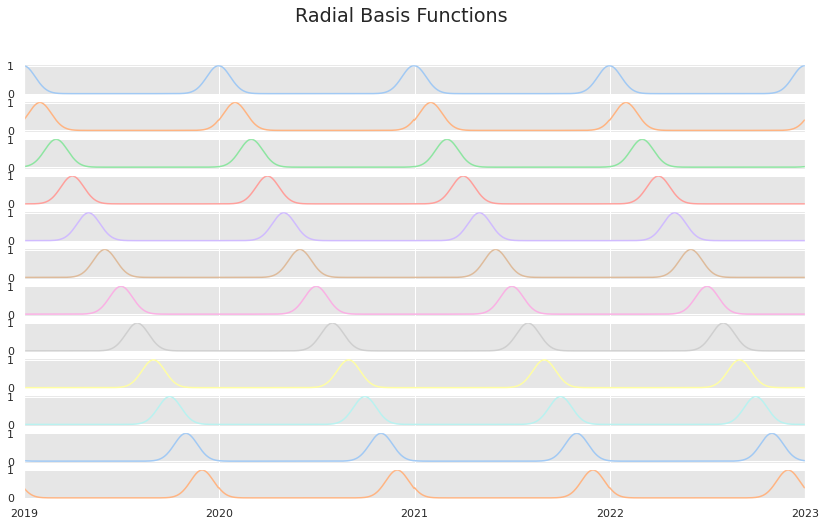

In [63]:
from sklego.preprocessing import RepeatingBasisFunction

rbf = RepeatingBasisFunction(n_periods=12,
                         	column="day_of_year",
                         	input_range=(1,365),
                         	remainder="drop")
rbf.fit(X)

X_3 = pd.DataFrame(index=X.index,
               	data=rbf.transform(X))
X_3.plot(subplots=True, figsize=(14, 8),
     	sharex=True, title="Radial Basis Functions",
     	legend=False);

Now, let us fit the linear regression model using the 12 radial basis function (RBF) features.

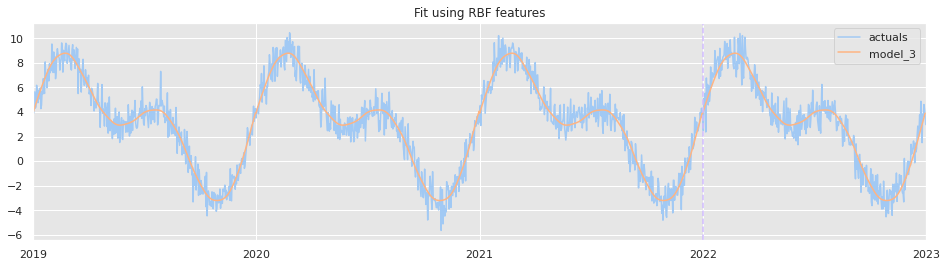

In [69]:
# Modeling
model_3 = LinearRegression().fit(X_3.iloc[:TRAIN_END],
                             y.iloc[:TRAIN_END])
time_df["model_3"] = model_3.predict(X_3)

# Plot the result
time_df[["actuals", "model_3"]].plot(figsize=(16,4),
                                    title="Fit using RBF features")
plt.axvline(date(2022, 1, 1), c="m", linestyle="--");

In this plot, we can see that the model accurately represents the real data when using the radial basis function (RBF) features.

**Final comparison**

Now, let's generate a numerical comparison of these three approaches to encoding time-related information.

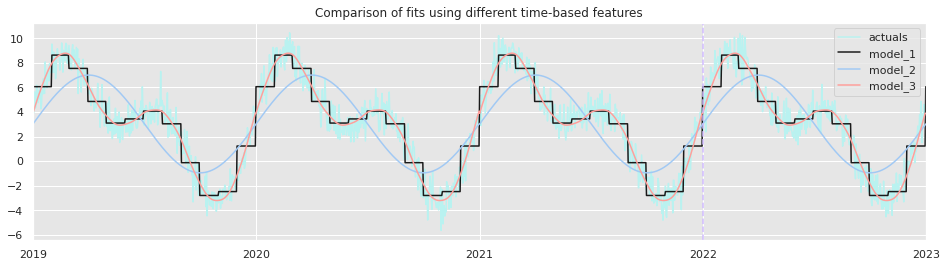

In [66]:
time_df.plot(title="Comparison of fits using different time-based features",
            figsize=(16,4),
            color = ["c", "k", "b", "r"])
plt.axvline(date(2022, 1, 1), c="m", linestyle="--");

In [68]:
score_list = []
for fit_col in ["model_1", "model_2", "model_3"]:
	scores = {
    	"model": fit_col,
    	"train_score": mean_absolute_error(
        	time_df.iloc[:TRAIN_END]["actuals"],
        	time_df.iloc[:TRAIN_END][fit_col]
    	),
    	"test_score": mean_absolute_error(
        	time_df.iloc[TRAIN_END:]["actuals"],
        	time_df.iloc[TRAIN_END:][fit_col]
    	)
	}
	score_list.append(scores)
scores_df = pd.DataFrame(score_list)
scores_df

,model,train_score,test_score
0,model_1,0.885871,0.937745
1,model_2,1.976537,1.982236
2,model_3,0.658624,0.702042


After examining the comparison, it is clear that the model using radial basis function (RBF) features yielded the best fit, while the model using sine/cosine features performed the worst. 

### 2.4 Feature Engineering for Text Data<a class="anchor" id="section_4"></a>

When working with text data, feature engineering plays a crucial role in transforming raw text into structured numerical features that can be used by machine learning algorithms. The process involves text preprocessing techniques, such as text cleaning, removal of stopwords, stemming, and lemmatization, to clean and normalize the data. Additionally, feature extraction methods like bag-of-words, TF-IDF, and word embeddings are employed to represent the text data in a meaningful way.

The ultimate goal of feature engineering for text data is to convert unstructured text into structured features, enabling tasks like text classification, sentiment analysis, and information retrieval. By leveraging these techniques, we can unlock valuable insights and build powerful models for text analysis.

In this section, we will explore text preprocessing techniques that include text cleaning, stopword removal, stemming and lemmatization, and text normalization. If you're interested in gaining in-depth knowledge about text data processing and analysis, we invite you to join our [NLP workshops](https://practicumai.org/courses/nlp/).

#### 2.4.1 Tokenization<a class="anchor" id="section_4_1"></a>
Tokenization is the process of breaking a sentence or document into individual words or phrases. The NLTK library offers a range of tokenizers, including word tokenizers and sentence tokenizers.

In [70]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize

text = "Feature engineering is the process of transforming raw data into meaningful features to enhance machine learning models."
words = word_tokenize(text)
sentences = sent_tokenize(text)

print("Tokenized words:", words)

print("Tokenized sentences:", sentences)

Tokenized words: ['Feature', 'engineering', 'is', 'the', 'process', 'of', 'transforming', 'raw', 'data', 'into', 'meaningful', 'features', 'to', 'enhance', 'machine', 'learning', 'models', '.']
Tokenized sentences: ['Feature engineering is the process of transforming raw data into meaningful features to enhance machine learning models.']


[nltk_data] Downloading package punkt to /home/zhao.qian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 2.4.2 Stop Word Removal<a class="anchor" id="section_4_2"></a>
Stop word removal involves eliminating commonly occurring words, such as "a," "the," and "and," that do not contribute significant meaning to the text. This process improves text processing efficiency and reduces data size. The NLTK library offers a predefined list of stop words for multiple languages.

In [72]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.casefold() not in stop_words]

print(filtered_words)

['Feature', 'engineering', 'process', 'transforming', 'raw', 'data', 'meaningful', 'features', 'enhance', 'machine', 'learning', 'models', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zhao.qian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2.4.3 Stemming and Lemmatization<a class="anchor" id="section_4_3"></a>
Stemming and lemmatization are techniques employed to reduce words to their base or root form. For instance, words like "running," "runner," and "runs" can be transformed into the root word "run". The NLTK library offers a range of stemmers and lemmatizers to perform these operations.

In [73]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words = [stemmer.stem(word) for word in filtered_words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print(stemmed_words)

print(lemmatized_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/zhao.qian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/zhao.qian/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['featur', 'engin', 'process', 'transform', 'raw', 'data', 'meaning', 'featur', 'enhanc', 'machin', 'learn', 'model', '.']
['Feature', 'engineering', 'process', 'transforming', 'raw', 'data', 'meaningful', 'feature', 'enhance', 'machine', 'learning', 'model', '.']


#### 2.4.4 Text Normalization<a class="anchor" id="section_4_4"></a>
Text normalization is a process that aims to standardize text by applying various transformations. These transformations can include converting all text to lowercase, removing punctuation marks, and expanding abbreviations and contractions to their full forms. The goal of text normalization is to create a consistent and uniform representation of the text data.

In [74]:
import re

def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"\b(can't|won't|shouldn't)\b", 'not', text)
    text = re.sub(r"\b(i'm|you're|he's|she's|it's|we're|they're)\b", 'be', text)
    return text

text = "Let's go to the park, it's a beautiful day!"
normalized_text = normalize_text(text)

print("Normalized text:", normalized_text)

Normalized text: lets go to the park its a beautiful day


## 3. Conclusion<a class="anchor" id="conclusion"></a>

In summary, this notebook has covered important aspects of feature engineering. We discussed techniques for handling numerical variables, including feature selection, scaling, and creating new features. We also explored methods for dealing with categorical variables, such as encoding and managing rare categories. Furthermore, we addressed time-series data and text preprocessing. By applying these techniques, data can be effectively transformed, leading to enhanced performance of machine learning models.

***

## Bonus Exercises

We will use the `%load` command to load the content of a specified file into the cell, primarily for the purpose of incorporating solutions once you have finished the exercises.

### E1: Binning

In this exercise, you will use the pandas function `pd.cut()` to perform equal frequency binning. Given the feature "crop_yield", you will create a new feature called "yield_category" by dividing the crop yield into different categories such as 'low', 'medium', 'high', and 'very high'.

Please complete the missing part of the code.

In [ ]:
import pandas as pd

# create a sample data frame
data = pd.DataFrame({'crop_yield': [50, 100, 75, 120, 90, 80, 110, 95]})

# create bins for different yield categories
bins = [0, 80, 100, 120, float('inf')]
labels = ['low', 'medium', 'high', 'very high']

# use pd.cut function to perform equal frequency binning 
data['yield_category'] = ```code it```

# display the updated data frame
print(data)

**Solution**

In [80]:
%load solutions/04.1_binning

   crop_yield yield_category
0          50            low
1         100         medium
2          75            low
3         120           high
4          90         medium
5          80            low
6         110           high
7          95         medium


### E2: Skewness and Kurtosis Handling

In this exercise, you will begin by calculating the skewness and kurtosis of the original data. Then, you will address the skewness and kurtosis by applying a Log transformation to the data. To complete the code, you will use the `stats.skew` and `stats.kurtosis` functions to fill in the necessary blanks.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Generate some data with high kurtosis
data = np.random.normal(0, 5, 1000)**3

# Calculate skewness and kurtosis for original data
skewness = ```code it```
kurtosis = ```code it```

# Log transformation
log_data = np.log(data)

# Remove any missing values (NaN) from log_data
log_data = log_data[~np.isnan(log_data)]

# Calculate skewness and kurtosis for log-transformed data
log_skewness = ```code it```
log_kurtosis = ```code it```

# Display the results
results = pd.DataFrame({
    'Original Data': [skewness, kurtosis],
    'Log Transformed Data': [log_skewness, log_kurtosis]
}, index=['Skewness', 'Kurtosis'])

print(results)

**Solution**

In [83]:
%load solutions/04.1_skewness_kurtosis

          Original Data  Log Transformed Data
Skewness       0.449967             -2.159218
Kurtosis      27.791939              8.078329


/scratch/local/2202306/ipykernel_49543/1229510656.py:14: RuntimeWarning: invalid value encountered in log
  log_data = np.log(data)


### E3: Creating New Features

In this exercise, you will generate polynomial features up to degree 2. To achieve this, you will create an instance of the `PolynomialFeatures` class called "poly" with a degree of 2. Using the `poly.fit_transform` function, you will generate a new matrix "X_poly" that includes the original features from X along with their polynomial combinations.

Please complete the missing part of the code.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# create a sample data set
X = np.array([[1, 2],
              [3, 4]])

# create polynomial features up to degree 2
poly = ```code it```
X_poly = ```code it```

# display the updated feature matrix
print(X_poly)

**Solution**

In [85]:
%load solutions/04.1_polynomial_features

[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
